In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow
from scipy.optimize import minimize
from math import radians, sin, cos, acos, asin, sqrt, atan2, degrees
from scipy.spatial import distance

In [ ]:
pd.set_option('display.max_columns', None)  # Set the maximum number of columns to display to None
pd.set_option('display.max_rows', None)  # Set the maximum number of rows to display to None

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp /content/drive/'My Drive'/YVW/628.xlsx .
# Read the data from an Excel file
df1 = pd.read_excel('628.xlsx')
# Print Sensor data
df1.head()

Job_ID  Actual_Latitude  Actual_Longitude  Estimated_Latitude  \
0  8084696       -37.759454        145.128055          -37.758825   
1  8195038       -37.754992        145.124592          -37.754239   
2  8359922       -37.757701        145.132867          -37.758229   
3  8231996       -37.757644        145.129883          -37.758627   
4  8203496       -37.757009        145.130750          -37.756727   

   Estimated_Longitude  Priority  Euclidean_Distance  Haversine_Distance  
0           145.128016         3            0.000630            0.069836  
1           145.124588         3            0.000753            0.083586  
2           145.133691         2            0.000979            0.093347  
3           145.129420         3            0.001086            0.116457  
4           145.129492         3            0.001289            0.115185

In [ ]:
!cp /content/drive/'My Drive'/YVW/117.xlsx .
# Read the data from an Excel file
df2 = pd.read_excel('117.xlsx')
# Print Sensor data
df2.head()

Job_ID  Actual_Latitude  Actual_Longitude  Estimated_Latitude  \
0  8231996       -37.757644        145.129883          -37.757466   
1  8314397       -37.761560        145.116026          -37.761636   
2  8314602       -37.759969        145.125908          -37.760101   
3  8320074       -37.757297        145.131833          -37.757504   
4  8092648       -37.758228        145.132048          -37.757595   

   Estimated_Longitude  Priority  Euclidean_Distance  Haversine_Distance  
0           145.130043         3            0.000240            0.024375  
1           145.116356         2            0.000339            0.030294  
2           145.125557         3            0.000375            0.034192  
3           145.131438         3            0.000445            0.041670  
4           145.131170         3            0.001083            0.104557

In [ ]:
!cp /content/drive/'My Drive'/YVW/116.xlsx .
# Read the data from an Excel file
df3 = pd.read_excel('116.xlsx')
# Print Sensor data
df3.head()

Job_ID  Actual_Latitude  Actual_Longitude  Estimated_Latitude  \
0  8150875       -37.757829        145.126734          -37.757984   
1  8259300       -37.755354        145.127514          -37.755890   
2  8082462       -37.757291        145.125430          -37.756751   
3  8084826       -37.754677        145.143522          -37.754626   
4  8208781       -37.754504        145.141017          -37.755566   

   Estimated_Longitude  Priority  Euclidean_Distance  Haversine_Distance  
0           145.126904         3            0.000230            0.022831  
1           145.127661         3            0.000555            0.060831  
2           145.125266         3            0.000565            0.061720  
3           145.144348         1            0.000827            0.072977  
4           145.140424         3            0.001217            0.128950

In [ ]:
!cp /content/drive/'My Drive'/YVW/104.xlsx .
# Read the data from an Excel file
df4 = pd.read_excel('104.xlsx')
# Print Sensor data
df4.head()

Job_ID  Actual_Latitude  Actual_Longitude  Estimated_Latitude  \
0  8084826       -37.754677        145.143522          -37.754470   
1  8249945       -37.754727        145.128333          -37.755297   
2  8165583       -37.756080        145.125563          -37.756121   
3  8231996       -37.757644        145.129883          -37.757314   
4  8243436       -37.752131        145.130033          -37.752915   

   Estimated_Longitude  Priority  Euclidean_Distance  Haversine_Distance  
0           145.143922         1            0.000450            0.042069  
1           145.128086         3            0.000622            0.066944  
2           145.126740         2            0.001177            0.103755  
3           145.128744         3            0.001186            0.106825  
4           145.131272         2            0.001466            0.139593

In [ ]:
!cp /content/drive/'My Drive'/YVW/103.xlsx .
# Read the data from an Excel file
df5 = pd.read_excel('103.xlsx')
# Print Sensor data
df5.head()

Job_ID  Actual_Latitude  Actual_Longitude  Estimated_Latitude  \
0  8084696       -37.759454        145.128055          -37.759166   
1  8249945       -37.754727        145.128333          -37.755468   
2  8359922       -37.757701        145.132867          -37.758428   
3  8304950       -37.753659        145.134286          -37.752809   
4  8231996       -37.757644        145.129883          -37.758233   

   Estimated_Longitude  Priority  Euclidean_Distance  Haversine_Distance  
0           145.128053         3            0.000288            0.031935  
1           145.128643         3            0.000803            0.086652  
2           145.132299         2            0.000923            0.095019  
3           145.133790         2            0.000984            0.103967  
4           145.128909         3            0.001138            0.107864

In [ ]:
common_jobs = set(df1['Job_ID']) & set(df2['Job_ID']) & set(df3['Job_ID']) & set(df4['Job_ID']) & set(df5['Job_ID'])
common_jobs = list(common_jobs)

In [ ]:
print(len(common_jobs))

65


In [ ]:
# Filter dataframes by common jobs
df1_common = df1[df1['Job_ID'].isin(common_jobs)]
df2_common = df2[df2['Job_ID'].isin(common_jobs)]
df3_common = df3[df3['Job_ID'].isin(common_jobs)]
df4_common = df4[df4['Job_ID'].isin(common_jobs)]
df5_common = df5[df5['Job_ID'].isin(common_jobs)]

In [ ]:
# Extract necessary columns from each dataframe (Estimated Latitude and Longitude)
df1_relevant = df1_common[['Job_ID', 'Actual_Latitude', 'Actual_Longitude', 'Estimated_Latitude', 'Estimated_Longitude']].rename(
    columns={'Estimated_Latitude': 'Sensor1_Estimated_Lat', 'Estimated_Longitude': 'Sensor1_Estimated_Lon'})
df2_relevant = df2_common[['Job_ID', 'Estimated_Latitude', 'Estimated_Longitude']].rename(
    columns={'Estimated_Latitude': 'Sensor2_Estimated_Lat', 'Estimated_Longitude': 'Sensor2_Estimated_Lon'})
df3_relevant = df3_common[['Job_ID', 'Estimated_Latitude', 'Estimated_Longitude']].rename(
    columns={'Estimated_Latitude': 'Sensor3_Estimated_Lat', 'Estimated_Longitude': 'Sensor3_Estimated_Lon'})
df4_relevant = df4_common[['Job_ID', 'Estimated_Latitude', 'Estimated_Longitude']].rename(
    columns={'Estimated_Latitude': 'Sensor4_Estimated_Lat', 'Estimated_Longitude': 'Sensor4_Estimated_Lon'})
df5_relevant = df5_common[['Job_ID', 'Estimated_Latitude', 'Estimated_Longitude']].rename(
    columns={'Estimated_Latitude': 'Sensor5_Estimated_Lat', 'Estimated_Longitude': 'Sensor5_Estimated_Lon'})




In [ ]:
# Merge the dataframes
merged_df = df1_relevant.merge(df2_relevant, on='Job_ID').merge(df3_relevant, on='Job_ID').merge(
    df4_relevant, on='Job_ID').merge(df5_relevant, on='Job_ID')

merged_df.head()

Job_ID  Actual_Latitude  Actual_Longitude  Sensor1_Estimated_Lat  \
0  8084696       -37.759454        145.128055             -37.758825   
1  8195038       -37.754992        145.124592             -37.754239   
2  8359922       -37.757701        145.132867             -37.758229   
3  8231996       -37.757644        145.129883             -37.758627   
4  8203496       -37.757009        145.130750             -37.756727   

   Sensor1_Estimated_Lon  Sensor2_Estimated_Lat  Sensor2_Estimated_Lon  \
0             145.128016             -37.758722             145.129884   
1             145.124588             -37.760697             145.124031   
2             145.133691             -37.757580             145.130902   
3             145.129420             -37.757466             145.130043   
4             145.129492             -37.757480             145.135123   

   Sensor3_Estimated_Lat  Sensor3_Estimated_Lon  Sensor4_Estimated_Lat  \
0             -37.757394             145.126359             -37.756693   
1             -37.756872             145.124342             -37.751263   
2             -37.758275             145.130933             -37.756383   
3             -37.757786             145.128299             -37.757314   
4             -37.758430             145.126890             -37.757544   

   Sensor4_Estimated_Lon  Sensor5_Estimated_Lat  Sensor5_Estimated_Lon  
0             145.128143             -37.759166             145.128053  
1             145.133234             -37.754294             145.126807  
2             145.128790             -37.758428             145.132299  
3             145.128744             -37.758233             145.128909  
4             145.129211             -37.756498             145.128401

In [ ]:
# Haversine function
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Earth radius in kilometers
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])

    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))

    return R * c

# Euclidean distance function
def euclidean_distance(lat1, lon1, lat2, lon2):
    return np.sqrt((lat1 - lat2) ** 2 + (lon1 - lon2) ** 2)

In [ ]:
# Calculate distances for each sensor
for sensor, (sensor_lat, sensor_lon) in sensors_list.items():
    estimated_lat_col = f'{sensor}_Estimated_Lat'
    estimated_lon_col = f'{sensor}_Estimated_Lon'

    # Calculate Euclidean and Haversine distances
    merged_df[f'{sensor}_Euclidean'] = euclidean_distance(sensor_lat, sensor_lon, merged_df[estimated_lat_col], merged_df[estimated_lon_col])
    merged_df[f'{sensor}_Haversine'] = haversine(sensor_lat, sensor_lon, merged_df[estimated_lat_col], merged_df[estimated_lon_col])

# Display the resulting DataFrame
print(merged_df.head())

    Job_ID  Actual_Latitude  Actual_Longitude  Sensor1_Estimated_Lat  \
0  8084696       -37.759454        145.128055             -37.758825   
1  8195038       -37.754992        145.124592             -37.754239   
2  8359922       -37.757701        145.132867             -37.758229   
3  8231996       -37.757644        145.129883             -37.758627   
4  8203496       -37.757009        145.130750             -37.756727   

   Sensor1_Estimated_Lon  Sensor2_Estimated_Lat  Sensor2_Estimated_Lon  \
0             145.128016             -37.758722             145.129884   
1             145.124588             -37.760697             145.124031   
2             145.133691             -37.757580             145.130902   
3             145.129420             -37.757466             145.130043   
4             145.129492             -37.757480             145.135123   

   Sensor3_Estimated_Lat  Sensor3_Estimated_Lon  Sensor4_Estimated_Lat  \
0             -37.757394             145.126359 

In [ ]:
sensors_list = {
    'Sensor1': (-37.758, 145.118),
    'Sensor2': (-37.758, 145.135),
    'Sensor3': (-37.767, 145.141),
    'Sensor4': (-37.767, 145.119),
    'Sensor5': (-37.768, 145.131)
}

In [ ]:
def weighted_lat_lon(df, x):

    # Define the sensor latitude and longitude columns
    sensor_lat_cols = ['Sensor1_Estimated_Lat', 'Sensor2_Estimated_Lat', 'Sensor3_Estimated_Lat', 'Sensor4_Estimated_Lat', 'Sensor5_Estimated_Lat']
    sensor_lon_cols = ['Sensor1_Estimated_Lon', 'Sensor2_Estimated_Lon', 'Sensor3_Estimated_Lon', 'Sensor4_Estimated_Lon', 'Sensor5_Estimated_Lon']

    # Calculate weights and apply to latitude and longitude
    def calculate_weighted_lat_lon(row):
        weights = []
        for i, sensor_name in enumerate(sensors_list.keys()):
            # Get the estimated lat/lon for the current sensor
            est_lat = row[sensor_lat_cols[i]]
            est_lon = row[sensor_lon_cols[i]]

            # Step 1: Calculate the distance from the current estimated location to its corresponding sensor in sensors_list
            target_lat, target_lon = sensors_list[sensor_name]
            distance_to_self = np.sqrt((est_lat - target_lat) ** 2 + (est_lon - target_lon) ** 2)

            # Step 2: Calculate the weight for the current sensor
            weight = np.exp(-x * distance_to_self)
            weights.append(weight)

        # Normalize weights
        weights = np.array(weights)
        weights = weights / np.sum(weights)

        # Debugging: Print weights
        print(f"Weights for row (x={x}): {weights}")

        # Get the sensor latitudes and longitudes
        latitudes = np.array([row[lat] for lat in sensor_lat_cols])
        longitudes = np.array([row[lon] for lon in sensor_lon_cols])

        # Calculate weighted latitude and longitude
        weighted_lat = np.sum(weights * latitudes)
        weighted_lon = np.sum(weights * longitudes)

        return weighted_lat, weighted_lon

    # Apply the function to each row in the dataframe
    df['Weighted_Latitude'], df['Weighted_Longitude'] = zip(*df.apply(calculate_weighted_lat_lon, axis=1))

    return df


In [ ]:
# Assuming 'merged_df' is your dataframe
merged_df_with_weighted_coords_euclidean = weighted_lat_lon(merged_df, x=2)
merged_df_with_weighted_coords_euclidean_x_3 = weighted_lat_lon(merged_df, x=3)
merged_df_with_weighted_coords_euclidean_x_4 = weighted_lat_lon(merged_df, x=4)

Weights for row (x=2): [0.20043889 0.20240618 0.19747014 0.19895003 0.20073476]
Weights for row (x=2): [0.2028905  0.20139061 0.19811501 0.19743271 0.20017118]
Weights for row (x=2): [0.19830206 0.2029454  0.19924468 0.19879856 0.20070931]
Weights for row (x=2): [0.19988704 0.20248317 0.19819379 0.19896886 0.20046713]
Weights for row (x=2): [0.19970838 0.20416209 0.19774268 0.19877015 0.1996167 ]
Weights for row (x=2): [0.20371564 0.1975234  0.19697671 0.20098564 0.2007986 ]
Weights for row (x=2): [0.20342931 0.19826879 0.19615066 0.2017426  0.20040864]
Weights for row (x=2): [0.19913744 0.20259567 0.19889548 0.198334   0.20103742]
Weights for row (x=2): [0.19930154 0.20301847 0.19857134 0.19850813 0.20060053]
Weights for row (x=2): [0.20070461 0.20173627 0.19808716 0.19907481 0.20039715]
Weights for row (x=2): [0.19956988 0.2030226  0.19841389 0.19857928 0.20041435]
Weights for row (x=2): [0.20178036 0.20247919 0.19702106 0.19799893 0.20072045]
Weights for row (x=2): [0.19896149 0.204

In [ ]:
print(merged_df_with_weighted_coords_euclidean.head())

    Job_ID  Actual_Latitude  Actual_Longitude  Sensor1_Estimated_Lat  \
0  8084696       -37.759454        145.128055             -37.758825   
1  8195038       -37.754992        145.124592             -37.754239   
2  8359922       -37.757701        145.132867             -37.758229   
3  8231996       -37.757644        145.129883             -37.758627   
4  8203496       -37.757009        145.130750             -37.756727   

   Sensor1_Estimated_Lon  Sensor2_Estimated_Lat  Sensor2_Estimated_Lon  \
0             145.128016             -37.758722             145.129884   
1             145.124588             -37.760697             145.124031   
2             145.133691             -37.757580             145.130902   
3             145.129420             -37.757466             145.130043   
4             145.129492             -37.757480             145.135123   

   Sensor3_Estimated_Lat  Sensor3_Estimated_Lon  Sensor4_Estimated_Lat  \
0             -37.757394             145.126359 

In [ ]:
# Selecting specific columns
selected_columns = ['Job_ID', 'Actual_Latitude','Actual_Longitude','Weighted_Latitude','Weighted_Longitude']


In [ ]:
df_euclidean = merged_df_with_weighted_coords_euclidean[selected_columns]
df_euclidean.head()

Job_ID  Actual_Latitude  Actual_Longitude  Weighted_Latitude  \
0  8084696       -37.759454        145.128055         -37.758166   
1  8195038       -37.754992        145.124592         -37.755484   
2  8359922       -37.757701        145.132867         -37.757779   
3  8231996       -37.757644        145.129883         -37.757885   
4  8203496       -37.757009        145.130750         -37.757334   

   Weighted_Longitude  
0          145.128100  
1          145.126578  
2          145.131322  
3          145.129087  
4          145.129854

In [ ]:
df_euclidean_3 = merged_df_with_weighted_coords_euclidean_x_3[selected_columns]
df_euclidean_3.head()

Job_ID  Actual_Latitude  Actual_Longitude  Weighted_Latitude  \
0  8084696       -37.759454        145.128055         -37.758166   
1  8195038       -37.754992        145.124592         -37.755484   
2  8359922       -37.757701        145.132867         -37.757779   
3  8231996       -37.757644        145.129883         -37.757885   
4  8203496       -37.757009        145.130750         -37.757334   

   Weighted_Longitude  
0          145.128100  
1          145.126578  
2          145.131322  
3          145.129087  
4          145.129854

In [ ]:
df_euclidean_4 = merged_df_with_weighted_coords_euclidean_x_4[selected_columns]
df_euclidean_4.head()

Job_ID  Actual_Latitude  Actual_Longitude  Weighted_Latitude  \
0  8084696       -37.759454        145.128055         -37.758166   
1  8195038       -37.754992        145.124592         -37.755484   
2  8359922       -37.757701        145.132867         -37.757779   
3  8231996       -37.757644        145.129883         -37.757885   
4  8203496       -37.757009        145.130750         -37.757334   

   Weighted_Longitude  
0          145.128100  
1          145.126578  
2          145.131322  
3          145.129087  
4          145.129854

In [ ]:
sensor_coords = {
    'WMS0117': (-37.758, 145.135),
    'WMS0103': (-37.768, 145.131),
    'WMS0104': (-37.767, 145.119),
    'WMS0116': (-37.767, 145.141),
    'WBS628': (-37.758, 145.118)
}

In [ ]:
pip install geopandas contextily


In [ ]:
import matplotlib.pyplot as plt
import contextily as cx
import geopandas as gpd
from shapely.geometry import Point

# Function to plot actual and weighted coordinates with sensors on basemap
def plot_weighted_coordinates(df, sensor_coords):
    # Convert dataframe to GeoDataFrame for plotting
    df_gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['Weighted_Longitude'], df['Weighted_Latitude']), crs='EPSG:4326')

    # Create GeoDataFrame for actual coordinates
    actual_gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['Actual_Longitude'], df['Actual_Latitude']), crs='EPSG:4326')

    # Create GeoDataFrame for sensor coordinates
    sensor_df = gpd.GeoDataFrame(sensor_coords.items(), columns=['Sensor_Name', 'Coordinates'])
    sensor_df['geometry'] = sensor_df['Coordinates'].apply(lambda x: Point(x[1], x[0]))  # Reversing lat/lon
    sensor_gdf = gpd.GeoDataFrame(sensor_df, geometry='geometry', crs='EPSG:4326')

    # Plot
    fig, ax = plt.subplots(figsize=(10, 10))

    # Plot actual coordinates (green dots)
    actual_gdf.plot(ax=ax, color='green', label='Actual Coordinates')

    # Plot weighted coordinates (blue dots)
    df_gdf.plot(ax=ax, color='blue', label='Weighted Coordinates')

    # Plot sensor coordinates (red dots)
    sensor_gdf.plot(ax=ax, color='red', label='Sensors', markersize=50)

    # Add labels for actual coordinates (Job_IDs)
    for x, y, label in zip(actual_gdf.geometry.x, actual_gdf.geometry.y, df['Job_ID']):
        ax.text(x, y, label, color='black', fontsize=10)

    # Add labels for sensor names
    for x, y, label in zip(sensor_gdf.geometry.x, sensor_gdf.geometry.y, sensor_gdf['Sensor_Name']):
        ax.text(x, y, label, color='red', fontsize=10)

    # Plot lines connecting actual and weighted coordinates
    for i in range(len(df)):
        ax.plot([actual_gdf.geometry.x.iloc[i], df_gdf.geometry.x.iloc[i]],
                [actual_gdf.geometry.y.iloc[i], df_gdf.geometry.y.iloc[i]], color='grey', linestyle='-', linewidth=1)

    # Add basemap using Contextily
    cx.add_basemap(ax, source=cx.providers.CartoDB.Positron, crs='EPSG:4326')

    # Set axis labels and title
    ax.set_title('Weighted vs Actual Coordinates with Sensors')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.legend()

    plt.show()



<ipython-input-47-35a78ad38bcf>:16: FutureWarning: You are adding a column named 'geometry' to a GeoDataFrame constructed without an active geometry column. Currently, this automatically sets the active geometry column to 'geometry' but in the future that will no longer happen. Instead, either provide geometry to the GeoDataFrame constructor (GeoDataFrame(... geometry=GeoSeries()) or use `set_geometry('geometry')` to explicitly set the active geometry column.
  sensor_df['geometry'] = sensor_df['Coordinates'].apply(lambda x: Point(x[1], x[0]))  # Reversing lat/lon


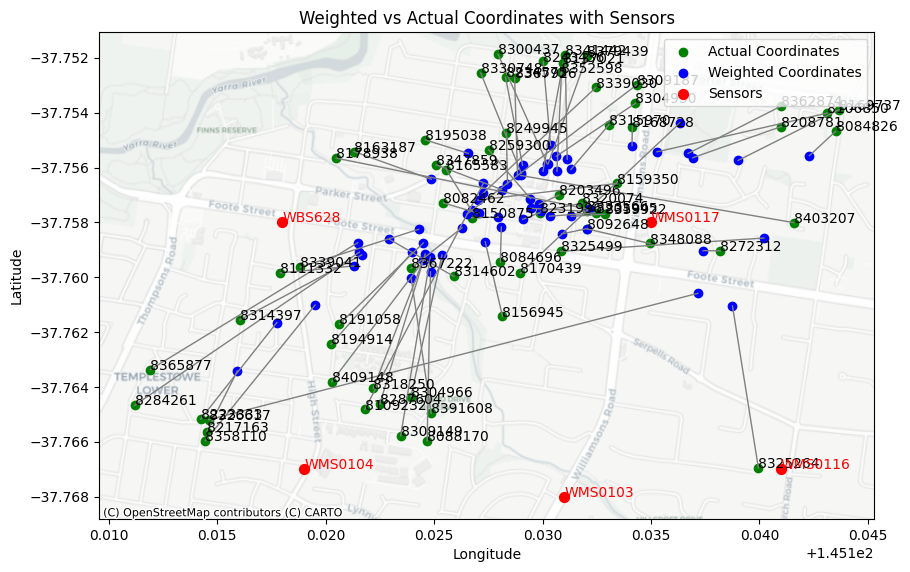

In [ ]:
# Assuming your final dataframe is named df_euclidean
plot_weighted_coordinates(df_euclidean, sensor_coords)

<ipython-input-49-bf14169a34cf>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Euclidean_Distance'] = df.apply(calculate_euclidean_distance, axis=1)
<ipython-input-49-bf14169a34cf>:27: FutureWarning: You are adding a column named 'geometry' to a GeoDataFrame constructed without an active geometry column. Currently, this automatically sets the active geometry column to 'geometry' but in the future that will no longer happen. Instead, either provide geometry to the GeoDataFrame constructor (GeoDataFrame(... geometry=GeoSeries()) or use `set_geometry('geometry')` to explicitly set the active geometry column.
  sensor_df['geometry'] = sensor_df['Coordinates'].apply(lambda x: Point(x[1], x[0]))  # Reversing lat/lon


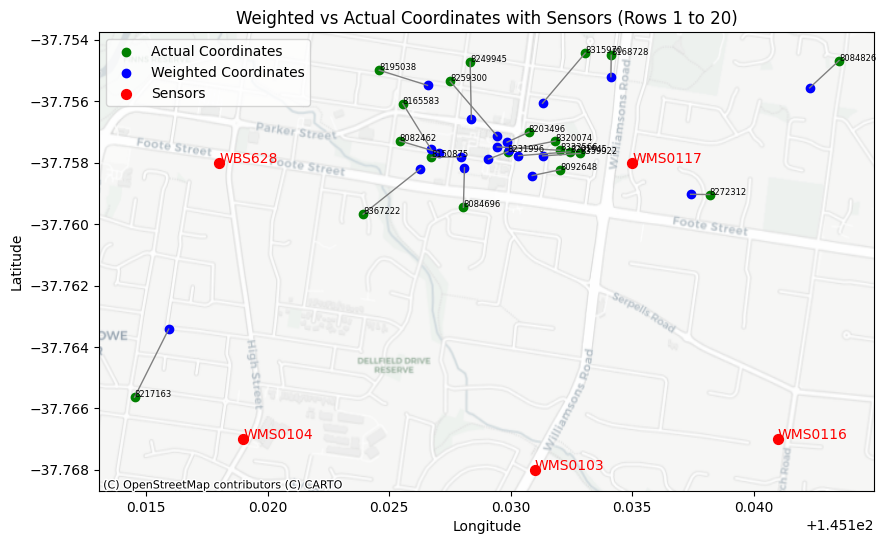

In [ ]:
import numpy as np

# Function to calculate Euclidean distance between actual and weighted coordinates
def calculate_euclidean_distance(row):
    return np.sqrt((row['Actual_Latitude'] - row['Weighted_Latitude'])**2 +
                   (row['Actual_Longitude'] - row['Weighted_Longitude'])**2)

# Function to plot actual and weighted coordinates with sensors on basemap for 20 rows at a time
def sort_plot_weighted_coordinates(df, sensor_coords, start=0, count=20):
    # Calculate Euclidean distance between actual and weighted coordinates
    df['Euclidean_Distance'] = df.apply(calculate_euclidean_distance, axis=1)

    # Sort dataframe by Euclidean distance
    df_sorted = df.sort_values(by='Euclidean_Distance').reset_index(drop=True)

    # Slice dataframe for the given range
    df_slice = df_sorted.iloc[start:start + count].copy()

    # Convert dataframe to GeoDataFrame for plotting
    df_gdf = gpd.GeoDataFrame(df_slice, geometry=gpd.points_from_xy(df_slice['Weighted_Longitude'], df_slice['Weighted_Latitude']), crs='EPSG:4326')

    # Create GeoDataFrame for actual coordinates
    actual_gdf = gpd.GeoDataFrame(df_slice, geometry=gpd.points_from_xy(df_slice['Actual_Longitude'], df_slice['Actual_Latitude']), crs='EPSG:4326')

    # Create GeoDataFrame for sensor coordinates
    sensor_df = gpd.GeoDataFrame(sensor_coords.items(), columns=['Sensor_Name', 'Coordinates'])
    sensor_df['geometry'] = sensor_df['Coordinates'].apply(lambda x: Point(x[1], x[0]))  # Reversing lat/lon
    sensor_gdf = gpd.GeoDataFrame(sensor_df, geometry='geometry', crs='EPSG:4326')

    # Plot
    fig, ax = plt.subplots(figsize=(10, 10))

    # Plot actual coordinates (green dots)
    actual_gdf.plot(ax=ax, color='green', label='Actual Coordinates')

    # Plot weighted coordinates (blue dots)
    df_gdf.plot(ax=ax, color='blue', label='Weighted Coordinates')

    # Plot sensor coordinates (red dots)
    sensor_gdf.plot(ax=ax, color='red', label='Sensors', markersize=50)

    # Add labels for actual coordinates (Job_IDs)
    for x, y, label in zip(actual_gdf.geometry.x, actual_gdf.geometry.y, df_slice['Job_ID']):
        ax.text(x, y, label, color='black', fontsize=6)

    # Add labels for sensor names
    for x, y, label in zip(sensor_gdf.geometry.x, sensor_gdf.geometry.y, sensor_gdf['Sensor_Name']):
        ax.text(x, y, label, color='red', fontsize=10)

    # Plot lines connecting actual and weighted coordinates
    for i in range(len(df_slice)):
        ax.plot([actual_gdf.geometry.x.iloc[i], df_gdf.geometry.x.iloc[i]],
                [actual_gdf.geometry.y.iloc[i], df_gdf.geometry.y.iloc[i]], color='grey', linestyle='-', linewidth=1)

    # Add basemap using Contextily
    cx.add_basemap(ax, source=cx.providers.CartoDB.Positron, crs='EPSG:4326')

    # Set axis labels and title
    ax.set_title(f'Weighted vs Actual Coordinates with Sensors (Rows {start+1} to {start+count})')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.legend()

    plt.show()

# Assuming your final dataframe is named df_euclidean
sort_plot_weighted_coordinates(df_euclidean, sensor_coords, start=0, count=20)  # Plot first 20 rows

# To plot the next 20 rows, call:
# plot_weighted_coordinates(df_euclidean, sensor_coords, start=20, count=20)


In [ ]:
# Function to calculate Euclidean distance between actual and weighted coordinates
def calculate_euclidean_distance(row):
    return np.sqrt((row['Actual_Latitude'] - row['Weighted_Latitude'])**2 +
                   (row['Actual_Longitude'] - row['Weighted_Longitude'])**2)

# Step 1: Calculate distance and sort the dataframe only once
def calculate_and_sort_euclidean(df):
    # Calculate Euclidean distance
    df['Euclidean_Distance'] = df.apply(calculate_euclidean_distance, axis=1)

    # Sort the dataframe by Euclidean distance
    sorted_df = df.sort_values(by='Euclidean_Distance').reset_index(drop=True)

    return sorted_df

In [ ]:
# Step 1: Calculate and sort the Euclidean distance once
sorted_df_euclidean = calculate_and_sort_euclidean(df_euclidean)

<ipython-input-50-2fab0de26a1f>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Euclidean_Distance'] = df.apply(calculate_euclidean_distance, axis=1)


In [ ]:
# Step 1: Calculate and sort the Euclidean distance once
sorted_df_euclidean_3 = calculate_and_sort_euclidean(df_euclidean_3)

<ipython-input-50-2fab0de26a1f>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Euclidean_Distance'] = df.apply(calculate_euclidean_distance, axis=1)


In [ ]:
# Step 1: Calculate and sort the Euclidean distance once
sorted_df_euclidean_4 = calculate_and_sort_euclidean(df_euclidean_4)

<ipython-input-50-2fab0de26a1f>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Euclidean_Distance'] = df.apply(calculate_euclidean_distance, axis=1)


In [ ]:
def plot_all_weighted_coordinates(sorted_df, sensor_coords, rows_per_plot=30):
    num_rows = sorted_df.shape[0]
    num_plots = (num_rows + rows_per_plot - 1) // rows_per_plot  # Calculate the number of plots needed

    # Create GeoDataFrame for sensor coordinates
    sensor_df = gpd.GeoDataFrame(sensor_coords.items(), columns=['Sensor_Name', 'Coordinates'])
    sensor_df['geometry'] = sensor_df['Coordinates'].apply(lambda x: Point(x[1], x[0]))  # Reversing lat/lon
    sensor_gdf = gpd.GeoDataFrame(sensor_df, geometry='geometry', crs='EPSG:4326')

    # Iterate through the dataframe in chunks of `rows_per_plot`
    for plot_idx in range(num_plots):
        start = plot_idx * rows_per_plot
        end = min((plot_idx + 1) * rows_per_plot, num_rows)
        df_slice = sorted_df.iloc[start:end].copy()

        # Convert dataframe to GeoDataFrame for plotting
        df_gdf = gpd.GeoDataFrame(df_slice, geometry=gpd.points_from_xy(df_slice['Weighted_Longitude'], df_slice['Weighted_Latitude']), crs='EPSG:4326')

        # Create GeoDataFrame for actual coordinates
        actual_gdf = gpd.GeoDataFrame(df_slice, geometry=gpd.points_from_xy(df_slice['Actual_Longitude'], df_slice['Actual_Latitude']), crs='EPSG:4326')

        # Plot
        fig, ax = plt.subplots(figsize=(10, 10))

        # Plot actual coordinates (green dots)
        actual_gdf.plot(ax=ax, color='green', label='Actual', markersize=30)

        # Plot weighted coordinates (blue dots)
        df_gdf.plot(ax=ax, color='blue', label='Weighted', markersize=30)

        # Plot sensor coordinates (red dots)
        sensor_gdf.plot(ax=ax, color='red', label='Sensors', markersize=30)

        # Add labels for actual coordinates (Job_IDs)
        for x, y, label in zip(actual_gdf.geometry.x, actual_gdf.geometry.y, df_slice['Job_ID']):
            ax.text(x, y, label, color='black', fontsize=6)

        # Add labels for sensor names
        for x, y, label in zip(sensor_gdf.geometry.x, sensor_gdf.geometry.y, sensor_gdf['Sensor_Name']):
            ax.text(x, y, label, color='red', fontsize=10)

        # Plot lines connecting actual and weighted coordinates
        for i in range(len(df_slice)):
            ax.plot([actual_gdf.geometry.x.iloc[i], df_gdf.geometry.x.iloc[i]],
                    [actual_gdf.geometry.y.iloc[i], df_gdf.geometry.y.iloc[i]], color='grey', linestyle='-', linewidth=1)

        # Add basemap using Contextily
        cx.add_basemap(ax, source=cx.providers.CartoDB.Positron, crs='EPSG:4326')

        # Set axis labels and title
        ax.set_title(f'Weighted vs Actual Coordinates with Sensors (Rows {start + 1} to {end})')
        plt.xlabel('Longitude')
        plt.ylabel('Latitude')
        plt.legend()

        plt.show()

<ipython-input-54-62145c979a2e>:7: FutureWarning: You are adding a column named 'geometry' to a GeoDataFrame constructed without an active geometry column. Currently, this automatically sets the active geometry column to 'geometry' but in the future that will no longer happen. Instead, either provide geometry to the GeoDataFrame constructor (GeoDataFrame(... geometry=GeoSeries()) or use `set_geometry('geometry')` to explicitly set the active geometry column.
  sensor_df['geometry'] = sensor_df['Coordinates'].apply(lambda x: Point(x[1], x[0]))  # Reversing lat/lon


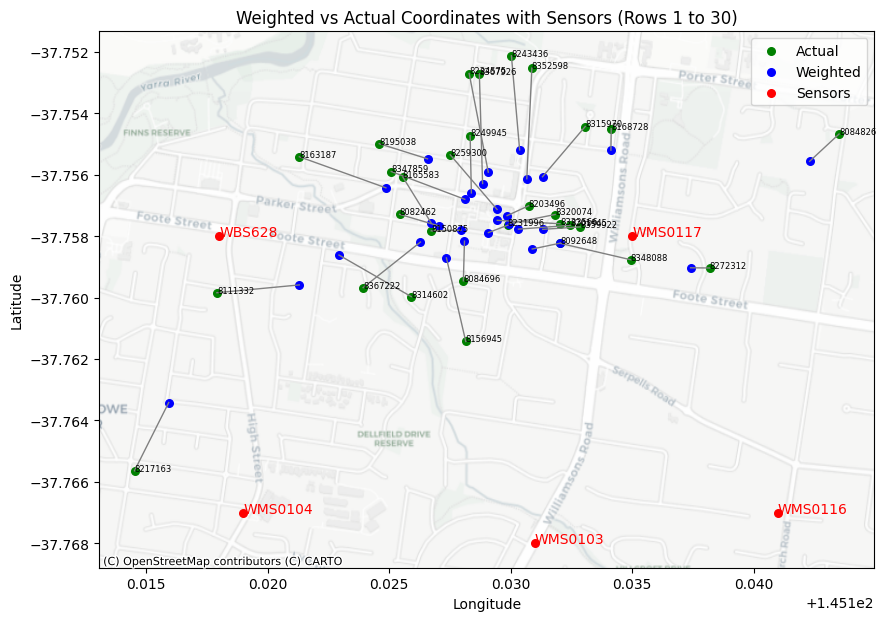

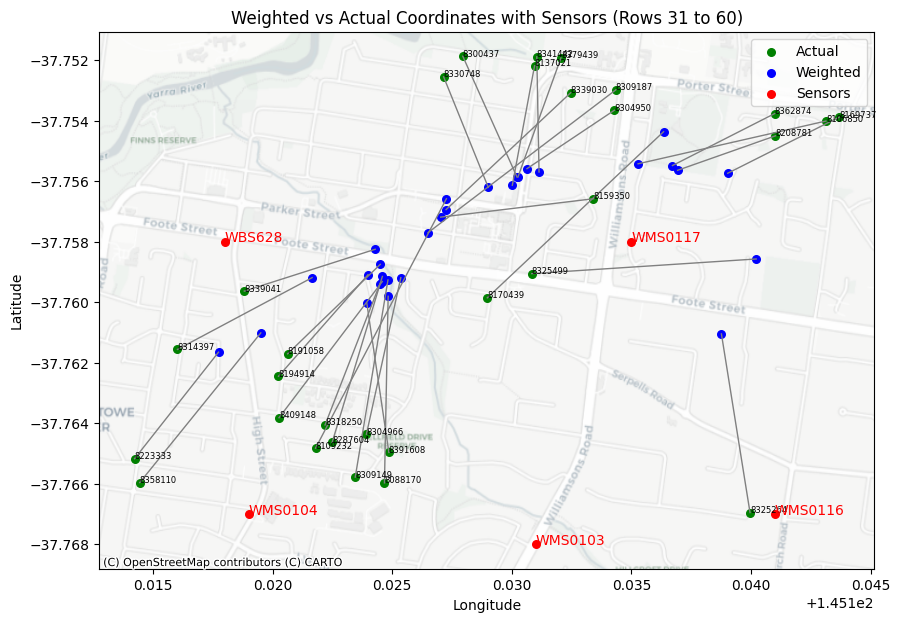

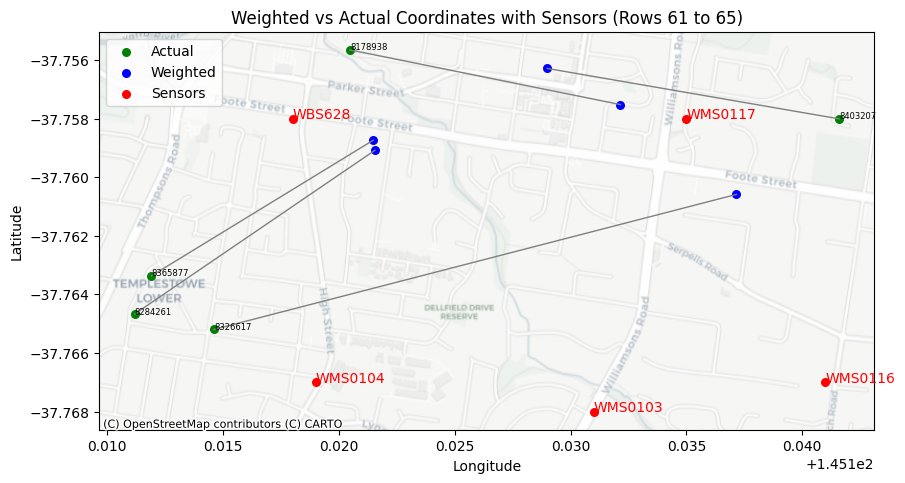

In [ ]:
# Step 2: Plot all subplots with 20 rows each
plot_all_weighted_coordinates(sorted_df_euclidean, sensor_coords, rows_per_plot=30)

<ipython-input-32-243ea8df6321>:7: FutureWarning: You are adding a column named 'geometry' to a GeoDataFrame constructed without an active geometry column. Currently, this automatically sets the active geometry column to 'geometry' but in the future that will no longer happen. Instead, either provide geometry to the GeoDataFrame constructor (GeoDataFrame(... geometry=GeoSeries()) or use `set_geometry('geometry')` to explicitly set the active geometry column.
  sensor_df['geometry'] = sensor_df['Coordinates'].apply(lambda x: Point(x[1], x[0]))  # Reversing lat/lon


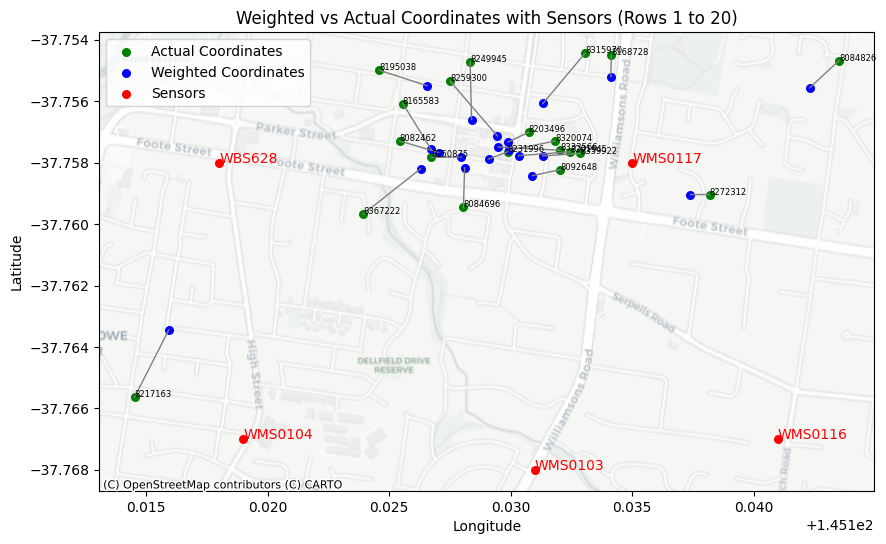

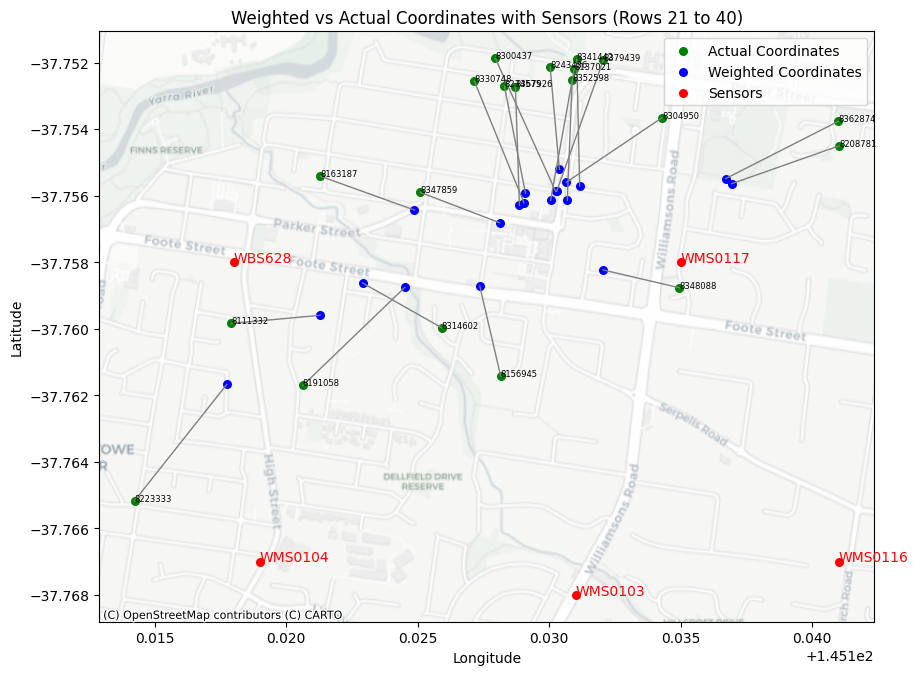

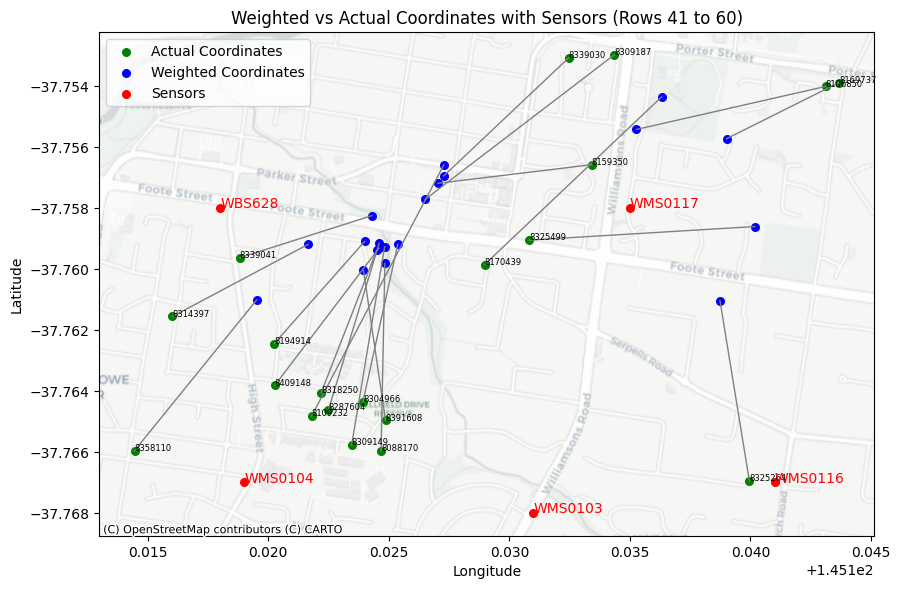

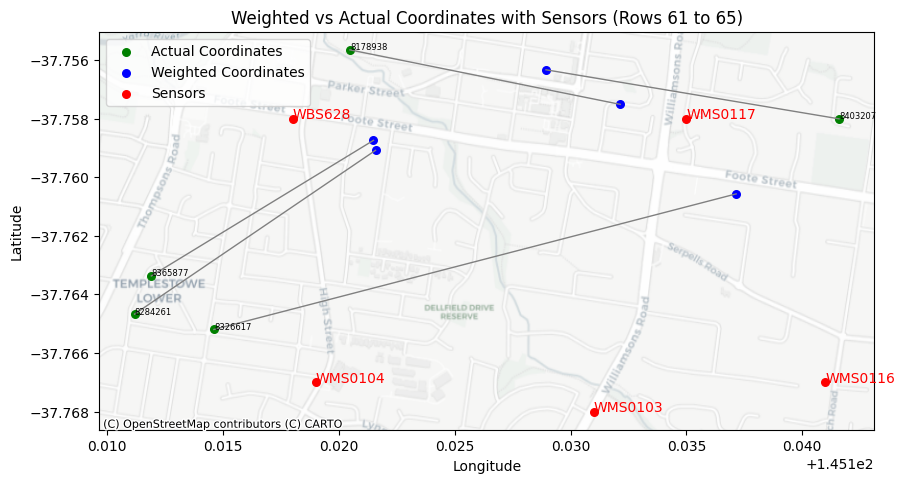

In [ ]:
# Step 2: Plot all subplots with 20 rows each
plot_all_weighted_coordinates(sorted_df_euclidean_3, sensor_coords, rows_per_plot=20)

<ipython-input-32-243ea8df6321>:7: FutureWarning: You are adding a column named 'geometry' to a GeoDataFrame constructed without an active geometry column. Currently, this automatically sets the active geometry column to 'geometry' but in the future that will no longer happen. Instead, either provide geometry to the GeoDataFrame constructor (GeoDataFrame(... geometry=GeoSeries()) or use `set_geometry('geometry')` to explicitly set the active geometry column.
  sensor_df['geometry'] = sensor_df['Coordinates'].apply(lambda x: Point(x[1], x[0]))  # Reversing lat/lon


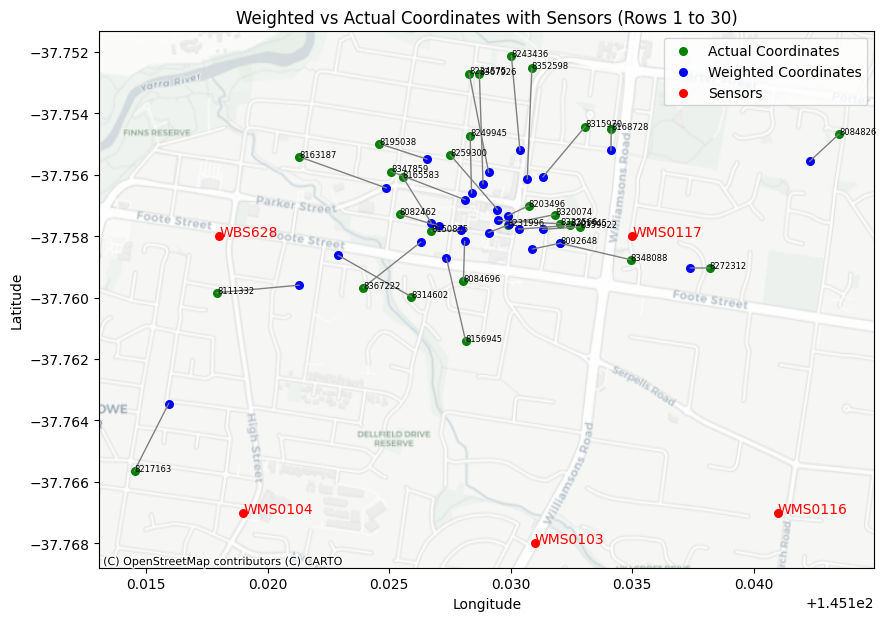

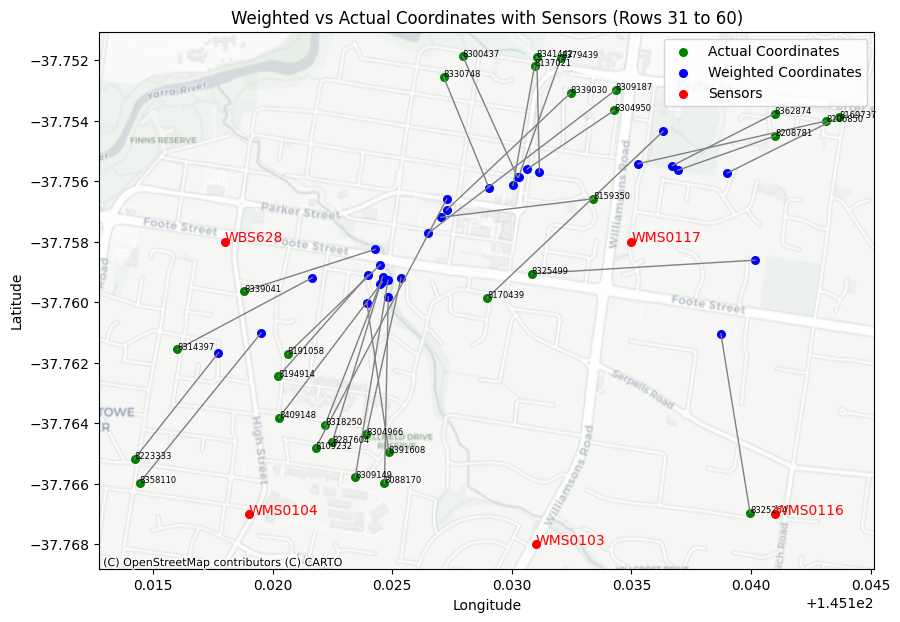

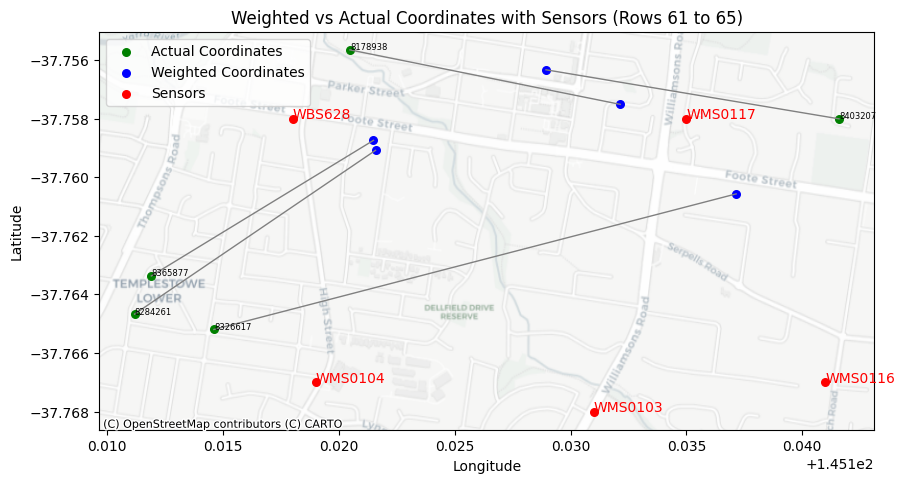

In [ ]:
# Step 2: Plot all subplots with 20 rows each
plot_all_weighted_coordinates(sorted_df_euclidean_4, sensor_coords, rows_per_plot=30)

In [ ]:
# Function to calculate RMS and variance for Euclidean distances
def calculate_rms_variance(df):
    # Extract Euclidean distances
    distances = df['Euclidean_Distance'].values

    # Calculate RMS (Root Mean Square)
    rms = np.sqrt(np.mean(distances**2))

    # Calculate variance
    variance = np.var(distances)

    return rms, variance

# Example usage after sorting the dataframe:
rms, variance = calculate_rms_variance(sorted_df_euclidean)

print(f"RMS of Euclidean Distances: {rms}")
print(f"Variance of Euclidean Distances: {variance}")


RMS of Euclidean Distances: 0.006071491213965923
Variance of Euclidean Distances: 1.3380944288904827e-05


In [ ]:
import numpy as np
from geopy.distance import geodesic

# Function to calculate RMSE between actual and predicted coordinates
def calculate_rmse(df, actual_lat_col, actual_lon_col, pred_lat_col, pred_lon_col):
    return np.sqrt(np.mean((df[actual_lat_col] - df[pred_lat_col])**2 + (df[actual_lon_col] - df[pred_lon_col])**2))

# Function to calculate mean Haversine distance between actual and predicted coordinates
def calculate_mean_haversine(df, actual_lat_col, actual_lon_col, pred_lat_col, pred_lon_col):
    haversine_distances = []
    for idx, row in df.iterrows():
        actual = (row[actual_lat_col], row[actual_lon_col])
        predicted = (row[pred_lat_col], row[pred_lon_col])
        haversine_distances.append(geodesic(actual, predicted).kilometers)
    return np.mean(haversine_distances)

# Function to calculate mean Euclidean distance between actual and predicted coordinates
def calculate_mean_euclidean(df, actual_lat_col, actual_lon_col, pred_lat_col, pred_lon_col):
    euclidean_distances = []
    for idx, row in df.iterrows():
        actual_lat = row[actual_lat_col]
        actual_lon = row[actual_lon_col]
        predicted_lat = row[pred_lat_col]
        predicted_lon = row[pred_lon_col]
        euclidean_distances.append(np.sqrt((actual_lat - predicted_lat)**2 + (actual_lon - predicted_lon)**2))
    return np.mean(euclidean_distances)

# Apply calculations for each sensor and the weighted coordinates
def evaluate_predictions():
    metrics = []

    # Calculate for Sensor 1
    rmse_sensor1 = calculate_rmse(merged_df, 'Actual_Latitude', 'Actual_Longitude', 'Sensor1_Estimated_Lat', 'Sensor1_Estimated_Lon')
    haversine_sensor1 = calculate_mean_haversine(merged_df, 'Actual_Latitude', 'Actual_Longitude', 'Sensor1_Estimated_Lat', 'Sensor1_Estimated_Lon')
    euclidean_sensor1 = calculate_mean_euclidean(merged_df, 'Actual_Latitude', 'Actual_Longitude', 'Sensor1_Estimated_Lat', 'Sensor1_Estimated_Lon')
    metrics.append(['WBS0628', rmse_sensor1, haversine_sensor1, euclidean_sensor1])

    # Calculate for Sensor 2
    rmse_sensor2 = calculate_rmse(merged_df, 'Actual_Latitude', 'Actual_Longitude', 'Sensor2_Estimated_Lat', 'Sensor2_Estimated_Lon')
    haversine_sensor2 = calculate_mean_haversine(merged_df, 'Actual_Latitude', 'Actual_Longitude', 'Sensor2_Estimated_Lat', 'Sensor2_Estimated_Lon')
    euclidean_sensor2 = calculate_mean_euclidean(merged_df, 'Actual_Latitude', 'Actual_Longitude', 'Sensor2_Estimated_Lat', 'Sensor2_Estimated_Lon')
    metrics.append(['WMS0117', rmse_sensor2, haversine_sensor2, euclidean_sensor2])

    # Calculate for Sensor 3
    rmse_sensor3 = calculate_rmse(merged_df, 'Actual_Latitude', 'Actual_Longitude', 'Sensor3_Estimated_Lat', 'Sensor3_Estimated_Lon')
    haversine_sensor3 = calculate_mean_haversine(merged_df, 'Actual_Latitude', 'Actual_Longitude', 'Sensor3_Estimated_Lat', 'Sensor3_Estimated_Lon')
    euclidean_sensor3 = calculate_mean_euclidean(merged_df, 'Actual_Latitude', 'Actual_Longitude', 'Sensor3_Estimated_Lat', 'Sensor3_Estimated_Lon')
    metrics.append(['WMS0116', rmse_sensor3, haversine_sensor3, euclidean_sensor3])

    # Calculate for Sensor 4
    rmse_sensor4 = calculate_rmse(merged_df, 'Actual_Latitude', 'Actual_Longitude', 'Sensor4_Estimated_Lat', 'Sensor4_Estimated_Lon')
    haversine_sensor4 = calculate_mean_haversine(merged_df, 'Actual_Latitude', 'Actual_Longitude', 'Sensor4_Estimated_Lat', 'Sensor4_Estimated_Lon')
    euclidean_sensor4 = calculate_mean_euclidean(merged_df, 'Actual_Latitude', 'Actual_Longitude', 'Sensor4_Estimated_Lat', 'Sensor4_Estimated_Lon')
    metrics.append(['WMS0104', rmse_sensor4, haversine_sensor4, euclidean_sensor4])

    # Calculate for Sensor 5
    rmse_sensor5 = calculate_rmse(merged_df, 'Actual_Latitude', 'Actual_Longitude', 'Sensor5_Estimated_Lat', 'Sensor5_Estimated_Lon')
    haversine_sensor5 = calculate_mean_haversine(merged_df, 'Actual_Latitude', 'Actual_Longitude', 'Sensor5_Estimated_Lat', 'Sensor5_Estimated_Lon')
    euclidean_sensor5 = calculate_mean_euclidean(merged_df, 'Actual_Latitude', 'Actual_Longitude', 'Sensor5_Estimated_Lat', 'Sensor5_Estimated_Lon')
    metrics.append(['WMS0103', rmse_sensor5, haversine_sensor5, euclidean_sensor5])

    # Calculate for Weighted Coordinates
    rmse_weighted_2 = calculate_rmse(df_euclidean, 'Actual_Latitude', 'Actual_Longitude', 'Weighted_Latitude', 'Weighted_Longitude')
    haversine_weighted_2 = calculate_mean_haversine(df_euclidean, 'Actual_Latitude', 'Actual_Longitude', 'Weighted_Latitude', 'Weighted_Longitude')
    euclidean_weighted_2 = calculate_mean_euclidean(df_euclidean, 'Actual_Latitude', 'Actual_Longitude', 'Weighted_Latitude', 'Weighted_Longitude')
    metrics.append(['Weighted x=2', rmse_weighted_2, haversine_weighted_2, euclidean_weighted_2])

        # Calculate for Weighted Coordinates
    rmse_weighted_3 = calculate_rmse(df_euclidean_3, 'Actual_Latitude', 'Actual_Longitude', 'Weighted_Latitude', 'Weighted_Longitude')
    haversine_weighted_3 = calculate_mean_haversine(df_euclidean_3, 'Actual_Latitude', 'Actual_Longitude', 'Weighted_Latitude', 'Weighted_Longitude')
    euclidean_weighted_3 = calculate_mean_euclidean(df_euclidean_3, 'Actual_Latitude', 'Actual_Longitude', 'Weighted_Latitude', 'Weighted_Longitude')
    metrics.append(['Weighted x=3', rmse_weighted_3, haversine_weighted_3, euclidean_weighted_3])

            # Calculate for Weighted Coordinates
    rmse_weighted_4 = calculate_rmse(df_euclidean_4, 'Actual_Latitude', 'Actual_Longitude', 'Weighted_Latitude', 'Weighted_Longitude')
    haversine_weighted_4 = calculate_mean_haversine(df_euclidean_4, 'Actual_Latitude', 'Actual_Longitude', 'Weighted_Latitude', 'Weighted_Longitude')
    euclidean_weighted_4 = calculate_mean_euclidean(df_euclidean_4, 'Actual_Latitude', 'Actual_Longitude', 'Weighted_Latitude', 'Weighted_Longitude')
    metrics.append(['Weighted x=4', rmse_weighted_4, haversine_weighted_4, euclidean_weighted_4])

    return metrics

# Create and print the results table
metrics_table = evaluate_predictions()

metrics_df = pd.DataFrame(metrics_table, columns=['Prediction', 'RMSE', 'Mean Haversine Distance', 'Mean Euclidean Distance'])
print(metrics_df)


     Prediction      RMSE  Mean Haversine Distance  Mean Euclidean Distance
0       WBS0628  0.007428                 0.589621                 0.005978
1       WMS0117  0.005463                 0.429634                 0.004340
2       WMS0116  0.007978                 0.607308                 0.006217
3       WMS0104  0.006385                 0.500257                 0.005118
4       WMS0103  0.007408                 0.536537                 0.005686
5  Weighted x=2  0.006071                 0.471270                 0.004846
6  Weighted x=3  0.006071                 0.471270                 0.004846
7  Weighted x=4  0.006071                 0.471270                 0.004846


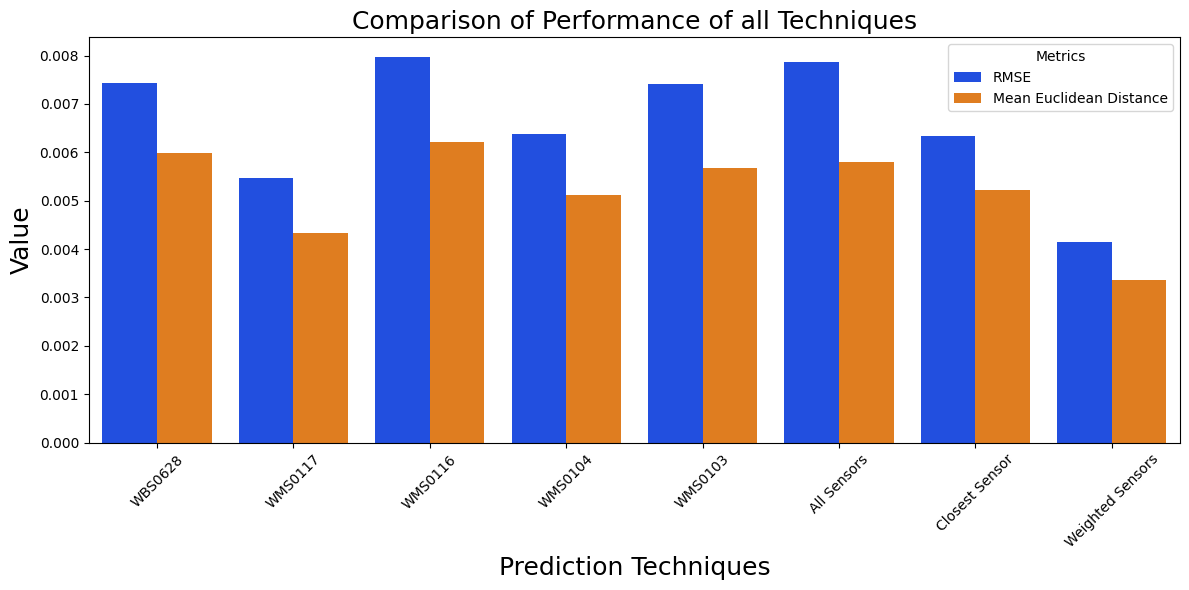

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a DataFrame with the provided data
data = {
    'Sensor': ['WBS0628', 'WMS0117', 'WMS0116', 'WMS0104', 'WMS0103',
               'All Sensors', 'Closest Sensor', 'Weighted Sensors'],
    'RMSE': [0.007428, 0.005463, 0.007978, 0.006385, 0.007408,
             0.007865, 0.006332, 0.004141],
    'Mean Euclidean Distance': [0.005978, 0.004340, 0.006217,
                                 0.005118, 0.005686,
                                 0.005809, 0.005229, 0.003371]
}

df = pd.DataFrame(data)

# Reshape the DataFrame to long format
df_melted = df.melt(id_vars='Sensor',
                    var_name='Metric',
                    value_name='Value')

# Set the color palette
sns.set_palette("bright")

# Create the grouped bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Sensor', y='Value', hue='Metric', data=df_melted)

# Add titles and labels
plt.title('Comparison of Performance of all Techniques',fontsize = "18")
plt.ylabel('Value', fontsize = "18")
plt.xlabel('Prediction Techniques', fontsize = "18")
plt.xticks(rotation=45)
plt.legend(title='Metrics')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()
